In [58]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [59]:
df = pd.read_csv('housing_cleaned.csv')
df2 = pd.read_csv('housing_cleaned.csv')

df2 = df2[df2["Size(sqft)"].str.contains("N/A") == False]
df2 = df2[df2["Size(sqft)"].str.contains("Limited") == False]
df2= df2[df2["Bedrooms"].str.contains("5+") == False]
df = df[df["Bedrooms"].str.contains("5+") == False]
df2['Bedrooms'] = df2["Bedrooms"].astype(float)
df2['Bathrooms'] = df2["Bathrooms"].astype(float)
df2['Size(sqft)'] = df2["Size(sqft)"].astype(float)
df['Bedrooms'] = df["Bedrooms"].astype(float)
df['Bathrooms'] = df["Bathrooms"].astype(float)


In [60]:
status = pd.get_dummies(df2['Location'], dtype = int)
status3 = pd.get_dummies(df2['Style'], dtype = int)

df2 = pd.concat([df2, status, status3,], axis = 1)

df2.drop(columns='Location',inplace=True)
df2.drop(columns='Den',inplace=True)
df2.drop(columns='Bachelor/Studio',inplace=True)
df2.drop(columns='Style',inplace=True)
df2.drop(columns='Air Conditioned  ',inplace=True)
df2.drop(columns = 'Title', inplace = True)
df2

,Unnamed: 0,Price,Bedrooms,Bathrooms,Size(sqft),Guelph,Hamilton,Kitchener,London,Ottawa,Toronto,Apartment,Basement,Condo,Duplex/Triplex,House,Townhouse
0,0,1700,2.0,1.0,800.0,1,0,0,0,0,0,0,1,0,0,0,0
2,2,2381,1.0,1.0,721.0,1,0,0,0,0,0,1,0,0,0,0,0
3,3,2798,2.0,2.0,1002.0,1,0,0,0,0,0,1,0,0,0,0,0
4,4,2250,1.0,1.0,710.0,1,0,0,0,0,0,1,0,0,0,0,0
6,6,1879,1.0,1.0,617.0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1266,3395,2.0,1.0,899.0,0,0,0,0,0,1,1,0,0,0,0,0
1192,1268,2200,1.0,1.0,550.0,0,0,0,0,0,1,0,0,1,0,0,0
1193,1269,2200,2.0,1.0,2000.0,0,0,0,0,0,1,0,1,0,0,0,0
1195,1272,2645,2.0,1.0,815.0,0,0,0,0,0,1,1,0,0,0,0,0


In [61]:
df2.shape

(843, 17)

In [62]:
numeric_cols = df2.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print(corr['Price'].sort_values(ascending = False), '\n')

Price              1.000000
Bedrooms           0.548957
Size(sqft)         0.493967
Bathrooms          0.412231
 House             0.283265
Toronto            0.177393
Kitchener          0.116772
 Condo             0.078198
Unnamed: 0         0.031240
Guelph             0.020368
 Townhouse         0.013488
 Apartment        -0.023253
 Duplex/Triplex   -0.029112
London            -0.060716
Hamilton          -0.065083
Ottawa            -0.174501
 Basement         -0.229660
Name: Price, dtype: float64 



Text(0, 0.5, 'Price')

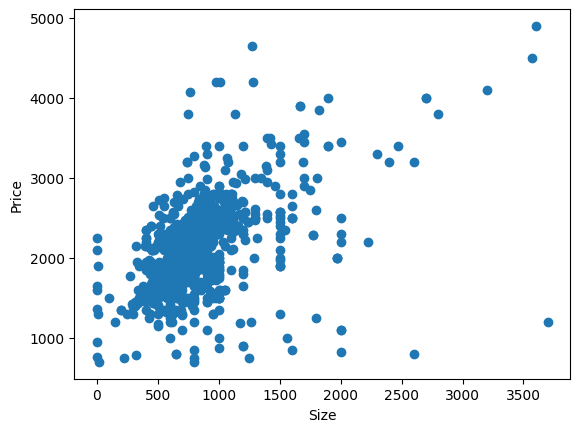

In [63]:
plt.scatter(x = df2['Size(sqft)'], y = df2['Price'])
plt.xlabel('Size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

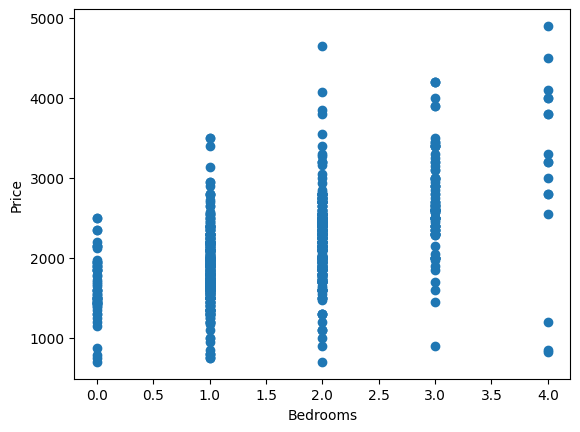

In [64]:
plt.scatter(x = df2['Bedrooms'], y = df2['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')

In [71]:
df2 = df2[df2['Size(sqft)'] > 50]
df2 = df2[df2['Size(sqft)'] < 3600]

<Axes: xlabel='Price', ylabel='Count'>

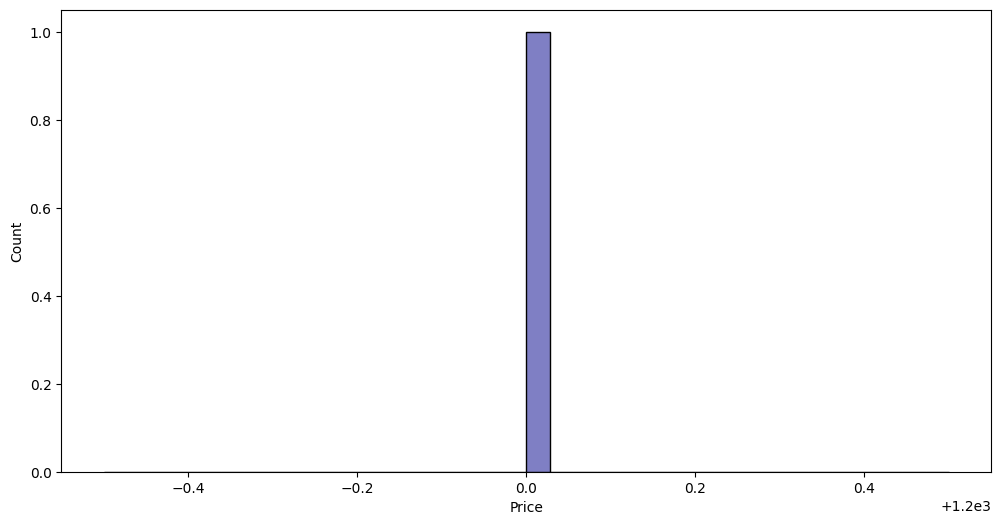

In [66]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#
plt.figure(figsize = (12,6))
sns.histplot(df2['Price'], kde = True,
             bins=int(180/5), color = 'darkblue')



In [72]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X = df2.drop('Price', axis =1)
y = df2.Price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)